<a href="https://colab.research.google.com/github/deepakpracheta/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

This our first capstone project. We chose this project because out of the given project list this by name we fe

# **Importing Libraries**


In [4]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [6]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Capstone Projects/EDA Project/Hotel Bookings.csv")  

In [8]:
hotel_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [9]:
hotel_df.shape

(119390, 32)

In [10]:
hotel_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [11]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
hotel_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hotel_df.isnull().sum()/hotel.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

As seen from data there are four columns namely Children, Country, Agent, Company. But out of these four company has above 94% of missing data. It does not have the validity of the information , so deleting it.

In [77]:
# Before deletion making a copy of our dataset
hotel = hotel_df.copy()

In [13]:
hotel.drop('company',axis=1,inplace=True)

There is some duplicate data also where all columns for booking are same. So removing such duolicate rows.

In [14]:
hotel.duplicated().value_counts()

False    87389
True     32001
dtype: int64

In [15]:
hotel.drop_duplicates(inplace=True)

In [16]:
hotel.shape

(87389, 31)

There are some bookings with 0 guests means 0 adults,0 babies,0 children. So removing such bookings. 

In [17]:
hotel.drop(hotel.loc[(hotel["adults"] + hotel["children"] + hotel["babies"] == 0)].index, inplace=True)

In [18]:
hotel.shape

(87223, 31)

There are some hotels with adr negative. How can a hotel can have average daily rate(adr). So changing it to 0.

In [19]:
hotel["adr"].iloc[hotel["adr"]<0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87223.0,0.275260,0.446648,0.0,0.00,0.0,1.0,1.0
lead_time,87223.0,79.976864,86.059628,0.0,11.00,49.0,125.0,737.0
arrival_date_year,87223.0,2016.210369,0.686055,2015.0,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,87223.0,26.834516,13.668994,1.0,16.00,27.0,37.0,53.0
arrival_date_day_of_month,87223.0,15.815989,8.835643,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,87223.0,1.004666,1.027421,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,87223.0,2.624079,2.039837,0.0,1.00,2.0,4.0,50.0
adults,87223.0,1.879413,0.621713,0.0,2.00,2.0,2.0,55.0
children,87219.0,0.138915,0.456291,0.0,0.00,0.0,0.0,10.0
babies,87223.0,0.010846,0.113708,0.0,0.00,0.0,0.0,10.0


 1. Which Hotel type has the highest ADR?

In [21]:
# Grouping by Hotel ADR
group_by_hotel=hotel.groupby('hotel')
highest_adr=group_by_hotel['adr'].sum().reset_index()
highest_adr

,hotel,adr
0,City Hotel,5927644.86
1,Resort Hotel,3363344.34


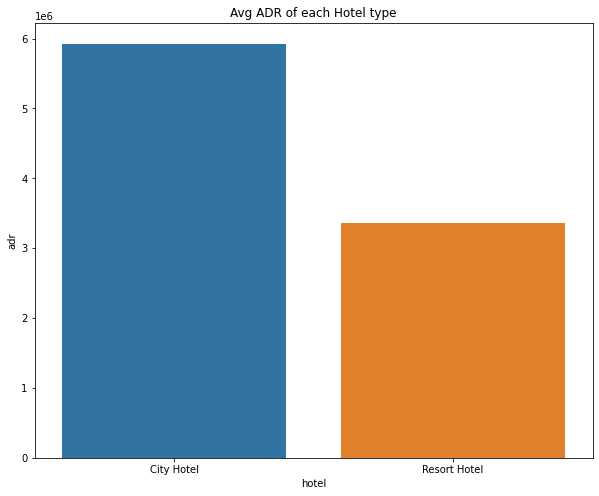

In [29]:
# setting plot size
plt.figure(figsize=(10,8))

# Setting Labels
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

# Plotting the Graph
sns.barplot(x='hotel',y='adr', data=highest_adr)

Observation:
Here through chart we can conclude that City Hotel generates more revenue as compared to Resort Hotels.

In [30]:
## Now We will look for Most common channel used for bookings.
# First we will check in City Hotel

In [42]:
book= hotel.groupby(['hotel','market_segment']).sum().reset_index()

In [51]:
book_city_hotel = book.loc[book['hotel']=='City Hotel']

In [52]:
book_city_hotel

,hotel,market_segment,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,Aviation,45,971,455721,5661,3524,245,566,229,...,0,63,13,101,57,3672.0,0,22738.68,6,27
1,City Hotel,Complementary,54,5732,1014065,14275,7405,152,601,752,...,18,203,156,1470,139,3647.0,35,1409.43,39,523
2,City Hotel,Corporate,263,40698,4471670,60557,35101,964,3198,2648,...,11,890,582,7573,749,31456.0,448,184138.88,268,812
3,City Hotel,Direct,912,273398,11165966,147402,87463,4288,11617,10198,...,115,180,103,288,2069,48205.0,65,671447.51,411,3185
4,City Hotel,Groups,887,350911,5279740,74587,43095,2052,4830,4196,...,3,23,270,62,1230,89688.0,23428,223301.30,4,511
5,City Hotel,Offline TA/TO,1257,702833,14594349,205300,115605,6633,16747,13193,...,59,108,177,273,1824,480335.0,30238,634369.98,48,2112
6,City Hotel,Online TA,12615,2769774,70424348,910940,547178,32051,83435,69025,...,186,190,604,439,6799,430318.0,129,4190209.08,1121,30727
7,City Hotel,Undefined,2,3,4030,64,8,1,2,5,...,0,0,0,0,0,0.0,0,30.00,0,3


In [53]:
hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [71]:
hotel[hotel['market_segment']=='Undefined']['hotel'].value_counts()

KeyError: ignored

In [78]:
hotel.drop(hotel[hotel.market_segment== 'Undefined'],axis = 0, inplace=True)

KeyError: ignored

In [76]:
hotel.head()

""
0
1
2
3
4


In [79]:
x = hotel[hotel['market_segment']=='Undefined'].index

In [82]:
hotel.drop(x , inplace=True)

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ